In [1]:
import sys
sys.path.append('../')

In [2]:
from scripts.utils import data_path
from scripts.cross_match_scripts import pandas_to_fits, desi_reliable_magnitudes
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import seaborn as sns
%matplotlib inline

matplotlib settings set


matplotlib settings set


# Counterparts and field sources catalogs construction

## Load DESI-CSC 30 arcsec cone search match

In [3]:
desi_csc_orig = pd.read_pickle(data_path+'/csc_allsky_desi_r30_gaia_dered.gz_pkl',compression='gzip')

In [4]:
desi_csc_orig = desi_reliable_magnitudes(desi_csc_orig) #make cuts for SNR of flux + add colors
desi_csc_orig

/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getat

,csc_name,csc_ra,csc_dec,csc_flux_05_2,csc_radec_err,csc_r_98,release,objid,brickid,ra,dec,brick_primary,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_g,flux_ivar_r,flux_ivar_z,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,dered_mag_g,dered_mag_r,dered_mag_z,dered_mag_w1,dered_mag_w2,dered_mag_w3,dered_mag_w4,snr_g,snr_r,snr_z,snr_w1,snr_w2,snr_w3,snr_w4,parallax,parallax_ivar,pmra,pmra_ivar,pmdec,pmdec_ivar,dist_arcsec,desi_id,all_mag_g,rel_mag_g,rel_dered_mag_g,all_mag_r,rel_mag_r,rel_dered_mag_r,all_mag_z,rel_mag_z,rel_dered_mag_z,all_mag_w1,rel_mag_w1,rel_dered_mag_w1,vega_mag_w1,all_mag_w2,rel_mag_w2,rel_dered_mag_w2,vega_mag_w2,all_mag_w3,rel_mag_w3,rel_dered_mag_w3,vega_mag_w3,all_mag_w4,rel_mag_w4,rel_dered_mag_w4,vega_mag_w4,rel_desi_flux_corr_z,rel_dered_g_r,rel_dered_g_z,rel_dered_r_z,rel_dered_z_w1,rel_dered_r_w2,rel_dered_w1_w2,rel_dered_z_w3,rel_dered_r_w4,rel_dered_w3_w4
0,2CXO J000000.0+004331,0.000020,0.725285,2.625836e-15,0.492084,1.376434,9010,9135,336127,359.993680,0.721193,1,0.264035,0.761373,1.464151,-2.279967,-0.936121,-109.650260,-1274.12740,2924.99000,2268.87720,293.554100,3.076859,0.628511,0.000788,0.000010,23.857758,22.736668,22.052845,NaN,NaN,NaN,NaN,14.279862,36.266293,25.085913,-3.999284,-0.742145,-3.078044,-4.096002,0.0,0.0,0.0,0.0,0.0,0.0,27.164009,9010_336127_9135,23.945846,23.945846,23.857758,22.796006,22.796006,22.736668,22.086035,22.086035,22.052845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.520281e-15,1.121090,1.804913,0.683823,NaN,NaN,NaN,NaN,NaN,NaN
1,2CXO J000000.0+004331,0.000020,0.725285,2.625836e-15,0.492084,1.376434,9010,9169,336127,359.994202,0.722597,1,0.994499,2.786103,5.748118,6.166792,6.704570,-0.933517,1110.99740,2478.61230,1837.17550,249.912500,2.884505,0.622227,0.000782,0.000011,22.417845,21.328133,20.567974,20.519806,20.430973,NaN,14.885468,49.511795,119.418724,90.869820,10.473576,5.288656,-0.026110,3.618951,0.0,0.0,0.0,0.0,0.0,0.0,23.070881,9010_336127_9169,22.505989,22.505989,22.417845,21.387507,21.387507,21.328133,20.601186,20.601186,20.567974,20.524852,20.524852,20.519806,17.825852,20.434073,20.434073,20.430973,17.095073,NaN,NaN,NaN,NaN,14.885717,NaN,NaN,NaN,9.894579e-15,1.089712,1.849871,0.760159,0.048168,0.897160,0.088833,NaN,NaN,NaN
2,2CXO J000000.0+004331,0.000020,0.725285,2.625836e-15,0.492084,1.376434,9010,9295,336127,359.997367,0.721166,1,0.287270,0.334849,0.528142,-1.608118,0.423848,16.828413,692.35394,2346.16870,1762.25840,213.479600,2.978809,0.614420,0.000778,0.000010,23.765974,23.628395,23.159851,NaN,23.428870,19.434230,15.398930,13.914554,14.056722,7.716652,-2.775487,0.332233,0.469412,2.225948,0.0,0.0,0.0,0.0,0.0,0.0,17.638166,9010_336127_9295,23.854274,23.854274,23.765974,23.687877,23.687877,23.628395,23.193123,23.193123,23.159851,NaN,NaN,NaN,NaN,23.431975,NaN,NaN,NaN,19.434892,NaN,NaN,NaN,15.399180,NaN,NaN,NaN,9.091730e-16,0.137579,0.606123,0.468544,NaN,NaN,NaN,NaN,NaN,NaN
3,2CXO J000000.0+004331,0.000020,0.725285,2.625836e-15,0.492084,1.376434,9010,9271,336127,359.996619,0.722544,1,0.195305,0.580013,1.060394,-1.374197,0.465793,55.299458,840.05010,1941.29630,1459.10840,181.554780,2.827259,0.595737,0.000749,0.000010,24.184935,23.031937,22.403067,NaN,23.326414,18.142536,15.188987,8.605151,22.155508,14.287992,-2.310637,0.359518,1.513426,2.704489,0.0,0.0,0.0,0.0,0.0,0.0,15.723989,9010_336127_9271,24.273217,24.273217,24.184935,23.091406,23.091406,23.031937,22.436332,22.436332,22.403067,NaN,NaN,NaN,NaN,23.329518,NaN,NaN,NaN,18.143198,NaN,NaN,NaN,15.189237,NaN,NaN,NaN,1.825409e-15,1.152998,1.781868,0.628870,NaN,NaN,NaN,NaN,NaN,NaN
4,2CXO J000000.0+004331,0.000020,0.725285,2.625836e-15,0.492084,1.376434,9010,9360,336127,359.998741,0.722629,1,0.162211,0.722331,4.141845,10.932156,10.346854,281.147600,-6404.08400,1451.76900,1055.47450,125.596010,2.283064,0.530093,0.000696,0.000010,24.386390,22.793606,20.923704,19.898174,19.959871,16.377000,NaN,6.180582,23.467144,46.417503,16.518280,7.533284,7.418694,-20.397125,0.0,0.0,0.0,

### Primary filters and DESI duplicates (ra,dec) removal

In [5]:
#step 1: filter brick ID
#next sort by name_csc, ra, dec and flux_g, with flux_g from largest to smallest
desi_csc = desi_csc_orig.query('csc_flux_05_2 >= 3e-15')
desi_csc = desi_csc.query('brick_primary == True')
print('desi reliable catalog:', len(desi_csc))
desi_csc = desi_csc.sort_values(by=['csc_name', 'csc_ra', 'csc_dec', 'flux_g'], ascending=[True, True, True, False])

#step 2: remove duplicates in ['ra_csc', 'dec_csc', 'ra', 'dec'] and keep the one with the highest flux_g 
desi_csc = desi_csc.drop_duplicates(subset=['csc_ra', 'csc_dec', 'ra', 'dec'], keep='first')

print('desi reliable catalog after non-primary brick and duplicates removal:', len(desi_csc))
print('number of csc sources after filtering', desi_csc.csc_name.nunique())
#sort by sep_csc so that the closest objects are first
desi_csc.sort_values(by=['csc_name', 'dist_arcsec'], inplace=True)
desi_csc.sample(10)

desi reliable catalog: 1384805
desi reliable catalog after non-primary brick and duplicates removal: 1384801
number of csc sources after filtering 60672


,csc_name,csc_ra,csc_dec,csc_flux_05_2,csc_radec_err,csc_r_98,release,objid,brickid,ra,dec,brick_primary,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_g,flux_ivar_r,flux_ivar_z,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,dered_mag_g,dered_mag_r,dered_mag_z,dered_mag_w1,dered_mag_w2,dered_mag_w3,dered_mag_w4,snr_g,snr_r,snr_z,snr_w1,snr_w2,snr_w3,snr_w4,parallax,parallax_ivar,pmra,pmra_ivar,pmdec,pmdec_ivar,dist_arcsec,desi_id,all_mag_g,rel_mag_g,rel_dered_mag_g,all_mag_r,rel_mag_r,rel_dered_mag_r,all_mag_z,rel_mag_z,rel_dered_mag_z,all_mag_w1,rel_mag_w1,rel_dered_mag_w1,vega_mag_w1,all_mag_w2,rel_mag_w2,rel_dered_mag_w2,vega_mag_w2,all_mag_w3,rel_mag_w3,rel_dered_mag_w3,vega_mag_w3,all_mag_w4,rel_mag_w4,rel_dered_mag_w4,vega_mag_w4,rel_desi_flux_corr_z,rel_dered_g_r,rel_dered_g_z,rel_dered_r_z,rel_dered_z_w1,rel_dered_r_w2,rel_dered_w1_w2,rel_dered_z_w3,rel_dered_r_w4,rel_dered_w3_w4
1050714,2CXO J052746.5-293911,81.944046,-29.653159,4.113157e-15,1.515650,4.239501,9010,10141,166778,81.943835,-29.655258,1,0.118347,0.297752,0.679313,0.075130,0.312135,-41.582745,823.471700,2044.03550,1153.30440,144.877410,4.018137,0.947012,0.001274,0.000015,24.764421,23.779875,22.899975,25.307450,23.762291,NaN,15.210730,5.350605,10.111775,8.176558,0.150600,0.303753,-1.484492,3.214680,0.0,0.0,0.0,0.0,0.0,0.0,7.585318,9010_166778_10141,24.817107,24.817107,24.764421,23.815363,23.815363,23.779875,22.919825,22.919825,22.899975,25.310467,NaN,NaN,NaN,23.764144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.210878,NaN,NaN,NaN,1.155040e-15,0.984546,1.864446,0.879900,NaN,NaN,NaN,NaN,NaN,NaN
1301168,2CXO J085029.0+374222,132.621197,37.706328,2.264547e-14,0.451459,1.262798,9011,3616,533276,132.623028,37.705133,1,0.094608,0.144801,0.398171,0.366097,-0.508953,178.001900,3311.009000,1041.39940,216.73906,317.677120,3.044629,0.668630,0.000807,0.000010,24.955180,24.527340,23.460262,23.584997,NaN,16.873152,13.699801,3.053066,2.131769,7.096808,0.638798,-0.416170,5.055457,10.693043,0.0,0.0,0.0,0.0,0.0,0.0,6.761492,9011_533276_3616,25.060180,NaN,NaN,24.598071,NaN,NaN,23.499826,23.499826,23.460262,23.591010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.873938,16.873938,16.873152,11.699938,13.700099,13.700099,13.699801,7.080099,6.894172e-16,NaN,NaN,NaN,NaN,NaN,NaN,6.58711,NaN,3.173351
1869321,2CXO J121852.4+152816,184.718622,15.471386,2.308639e-14,3.426472,9.584354,9010,1189,419381,184.714792,15.476119,1,0.135348,0.226464,0.293415,0.398100,-0.711768,-15.293913,-48.365900,1880.08310,805.21210,144.151300,3.324318,0.705140,0.000933,0.000012,24.587729,24.056160,23.799778,23.495232,NaN,NaN,NaN,5.868672,6.426190,3.522833,0.725844,-0.597690,-0.467175,-0.167642,0.0,0.0,0.0,0.0,0.0,0.0,21.611305,9010_419381_1189,24.671370,24.671370,24.587729,24.112502,24.112502,24.056160,23.831294,NaN,NaN,23.500020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.531569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987886,2CXO J123157.4+142111,187.989411,14.353268,4.674187e-15,1.137016,3.180403,9010,302,412426,187.991978,14.351300,1,0.167774,0.378535,0.610594,0.303753,-0.747773,37.896046,-2722.044200,1869.00330,495.29224,101.533510,3.288635,0.691888,0.000861,0.000011,24.320189,23.475250,22.991158,23.786943,NaN,18.552631,NaN,7.253220,8.424351,6.152583,0.550844,-0.621996,1.111961,-9.122318,0.0,0.0,0.0,0.0,0.0,0.0,11.414892,9010_412426_302,24.438188,24.438188,24.320189,23.554735,23.554735,23.475250,23.035619,23.035619,22.991158,23.793699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.553515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.061998e-15,0.844939,1.329031,0.484092,NaN,NaN,NaN,NaN,NaN,NaN
2953838,2CXO J213613.9-542340,324.058294,-54.394653,3.310894e-14,0.620817,1.736517,9010,1862,62230,324.072123,-54.393230,1,0.086119,0.129005,0.337803,1.392176,2.496714,-48.606090,-24.763657,6029.68070,2457.68140,205.284230,3.871643,0.894650,0.000892,0.000011,25.093864,24.677418,23.652576,22.136850,21.504173,NaN,NaN,6.687256,6.395436,4.839950,2.739314,2.361540,-1.451394,-0.081354,0.0,0.0,0.0,0.0,0.0,0.0,29.435056,9010_62230_1862,25.162253,2

# Calculating desi-sources around each source

In [6]:
def annuli_area_deg2(r_in_arcsec, r_out_arcsec):
    r_in_deg = r_in_arcsec/3600
    r_out_deg = r_out_arcsec/3600
    area = np.pi*(r_out_deg**2 - r_in_deg**2)
    return area

csc = pd.DataFrame(desi_csc.groupby(by = 'csc_name', ).agg({'csc_ra': np.mean, 'csc_dec': np.mean}))
smallest_sep  = desi_csc.groupby('csc_name')['dist_arcsec'].min()
csc['smallest_sep'] = smallest_sep

csc.reset_index(inplace=True)
desi_csc = desi_csc.merge(csc[['csc_name','smallest_sep']], on='csc_name')

is_hostless = desi_csc.eval('smallest_sep > 1.5*csc_r_98')
desi_csc['is_hostless'] = is_hostless
hostless_df = desi_csc[is_hostless][['csc_name', 'csc_ra', 'csc_dec', 'csc_flux_05_2', 'csc_radec_err',
       'csc_r_98', 'smallest_sep']].drop_duplicates(subset=['csc_ra', 'csc_dec'], keep='first')
desi_csc = desi_csc[~is_hostless]

desi_csc_x_ray_only = desi_csc.drop_duplicates(subset=['csc_name', 'csc_ra', 'csc_dec'], keep='first')

desi_csc.sample(10)

,csc_name,csc_ra,csc_dec,csc_flux_05_2,csc_radec_err,csc_r_98,release,objid,brickid,ra,dec,brick_primary,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_g,flux_ivar_r,flux_ivar_z,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,dered_mag_g,dered_mag_r,dered_mag_z,dered_mag_w1,dered_mag_w2,dered_mag_w3,dered_mag_w4,snr_g,snr_r,snr_z,snr_w1,snr_w2,snr_w3,snr_w4,parallax,parallax_ivar,pmra,pmra_ivar,pmdec,pmdec_ivar,dist_arcsec,desi_id,all_mag_g,rel_mag_g,rel_dered_mag_g,all_mag_r,rel_mag_r,rel_dered_mag_r,all_mag_z,rel_mag_z,rel_dered_mag_z,all_mag_w1,rel_mag_w1,rel_dered_mag_w1,vega_mag_w1,all_mag_w2,rel_mag_w2,rel_dered_mag_w2,vega_mag_w2,all_mag_w3,rel_mag_w3,rel_dered_mag_w3,vega_mag_w3,all_mag_w4,rel_mag_w4,rel_dered_mag_w4,vega_mag_w4,rel_desi_flux_corr_z,rel_dered_g_r,rel_dered_g_z,rel_dered_r_z,rel_dered_z_w1,rel_dered_r_w2,rel_dered_w1_w2,rel_dered_z_w3,rel_dered_r_w4,rel_dered_w3_w4,smallest_sep,is_hostless
537063,2CXO J084302.4+362837,130.760062,36.477012,8.766239e-15,0.450291,1.259531,9011,1501,527513,130.751850,36.481875,1,0.061117,0.175708,0.891210,4.653857,8.395287,68.365870,2583.96700,559.33875,194.55038,80.842440,2.896665,0.667181,0.000797,0.000011,25.411072,24.304810,22.578506,20.823395,20.185568,17.911976,13.968933,1.445435,2.450805,8.013082,7.920675,6.857368,1.930363,8.644268,0.0,0.0,0.0,0.0,0.0,0.0,29.519807,9011_527513_1501,25.534595,NaN,NaN,24.388021,NaN,NaN,22.625050,22.625050,22.578506,20.830467,20.830467,20.823395,18.131467,20.189911,20.189911,20.185568,16.850911,17.912902,NaN,NaN,NaN,13.969283,13.969283,13.968933,7.349283,1.553047e-15,NaN,NaN,NaN,1.755111,NaN,0.637827,NaN,NaN,NaN,0.559250,False
585032,2CXO J093209.6+213106,143.040306,21.518573,4.401352e-14,0.410539,1.148338,9010,1235,452035,143.033992,21.519915,1,2.715700,3.700367,2.314176,34.455460,34.113980,138.093440,-159.31688,569.04800,199.57202,97.239640,2.998547,0.586816,0.000659,0.000009,21.315590,21.012224,21.551441,18.651146,18.664164,17.148819,NaN,64.782290,52.275074,22.820127,59.664154,26.132654,3.545349,-0.473246,0.0,0.0,0.0,0.0,0.0,0.0,21.689266,9010_452035_1235,21.415296,21.415296,21.315590,21.079388,21.079388,21.012224,21.589009,21.589009,21.551441,18.656855,18.656855,18.651146,15.957855,18.667669,18.667669,18.664164,15.328669,17.149567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.999544e-15,0.303366,-0.235851,-0.539217,2.900295,2.34806,-0.013018,NaN,NaN,NaN,0.214979,False
933892,2CXO J133137.3+021107,202.905429,2.185307,3.268769e-15,0.547713,1.532035,9010,3691,344139,202.912084,2.182893,1,0.106599,0.305590,0.854007,1.076471,0.767491,21.214983,1793.49780,1427.20170,522.59880,80.863110,3.278172,0.697180,0.001275,0.000017,24.852660,23.734636,22.641972,22.415531,22.784576,19.182808,14.365527,4.027122,6.985910,7.679567,1.949028,0.640834,0.757606,7.351697,0.0,0.0,0.0,0.0,0.0,0.0,25.468539,9010_344139_3691,24.930617,24.930617,24.852660,23.787152,23.787152,23.734636,22.671346,22.671346,22.641972,22.419994,NaN,NaN,NaN,22.787317,NaN,NaN,NaN,19.183393,NaN,NaN,NaN,14.365748,14.365748,14.365527,7.745748,1.464867e-15,1.118024,2.210688,1.092664,NaN,NaN,NaN,NaN,9.369109,NaN,1.188693,False
1361699,2CXO J234038.3-510852,355.159947,-51.147831,6.942526e-15,1.138598,3.184828,9010,8383,73677,355.151565,-51.153175,1,0.330961,0.747405,1.095467,-2.128733,1.018732,9.946815,3068.02800,2412.10160,1384.17550,126.071970,3.290722,0.866067,0.001093,0.000014,23.657455,22.787075,22.384760,NaN,22.478334,20.005466,13.782729,16.254534,27.806840,12.300103,-3.861595,0.948059,0.328901,11.317623,0.0,0.0,0.0,0.0,0.0,0.0,26.988826,9010_73677_8383,23.700558,23.700558,23.657455,22.816110,22.816110,22.787075,22.401002,22.401002,22.384760,NaN,NaN,NaN,NaN,22.479850,NaN,NaN,NaN,20.005790,NaN,NaN,NaN,13.782852,13.782852,13.782729,7.162852,1.856449e-15,0.870380,1.272695,0.402315,NaN,NaN,NaN,NaN,9.004346,NaN,0.579105,False
816956,2CXO J122818.6+114804,187.077889,11.801151,7.856922e-15,0.433972,1.213884,9010,4239,398377,187.085321,11.799695,1,0.407210,0.373160,0.650573,5.936656,-4.947

flux lim: 3e-15
number of hostless x-ray sources with flux > 3e-15: 4545
number of not hostless x-ray sources with flux > 3e-15: 56127
fraction of hostless x-ray sources with flux > 3e-15: 0.07491099683544304
flux lim: 1e-14
number of hostless x-ray sources with flux > 1e-14: 731
number of not hostless x-ray sources with flux > 1e-14: 22693
fraction of hostless x-ray sources with flux > 1e-14: 0.0312073087431694


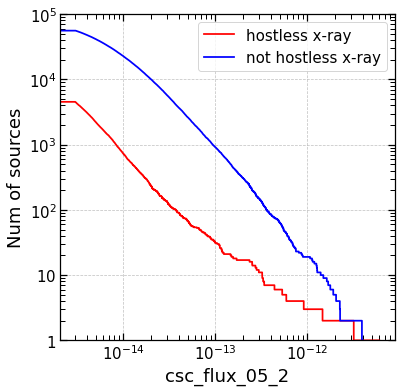

In [7]:
fig,  ax =  plt.subplots( figsize = (6,6))
sns.ecdfplot(hostless_df['csc_flux_05_2'], label='hostless x-ray', complementary=True, stat = 'count' , color='red', ax = ax)
sns.ecdfplot(desi_csc_x_ray_only['csc_flux_05_2'], label='not hostless x-ray', complementary=True, stat = 'count' , color='blue', ax = ax)
ax.set(xscale='log', yscale='log', xlabel='csc_flux_05_2', ylabel='Num of sources', ylim = [1,1e5])
ax.legend()

for fluxlim in [3e-15, 1e-14]:
    print('flux lim:', fluxlim)
    n_hostless_flux_lim = hostless_df.query('csc_flux_05_2 > @fluxlim').shape[0]
    n_not_hostless_flux_lim = desi_csc_x_ray_only.query('csc_flux_05_2 > @fluxlim').shape[0]
    print(f'number of hostless x-ray sources with flux > {fluxlim}:', n_hostless_flux_lim)
    print(f'number of not hostless x-ray sources with flux > {fluxlim}:', n_not_hostless_flux_lim)
    print(f'fraction of hostless x-ray sources with flux > {fluxlim}:', n_hostless_flux_lim/(n_not_hostless_flux_lim + n_hostless_flux_lim))

flux lim: 3e-15
number of hostless x-ray sources with flux > 3e-15: 57
number of not hostless x-ray sources with flux > 3e-15: 597
fraction of hostless x-ray sources with flux > 3e-15: 0.0871559633027523
flux lim: 1e-14
number of hostless x-ray sources with flux > 1e-14: 7
number of not hostless x-ray sources with flux > 1e-14: 241
fraction of hostless x-ray sources with flux > 1e-14: 0.028225806451612902


,csc_name,csc_ra,csc_dec,csc_flux_05_2,csc_radec_err,csc_r_98,smallest_sep
657207,2CXO J103121.9+573134,157.841331,57.526115,3.862979e-15,0.833616,2.331750,8.192553
658804,2CXO J103239.3+574035,158.164092,57.676566,8.115216e-15,0.428977,1.199912,9.702210
671830,2CXO J104453.0+585453,161.221229,58.914850,6.011270e-15,0.474495,1.327232,10.587097
668776,2CXO J104250.7+591245,160.711368,59.212503,3.033728e-15,0.608442,1.701902,7.503057
680434,2CXO J104957.7+583817,162.490766,58.638128,3.057514e-15,1.099309,3.074933,4.870499


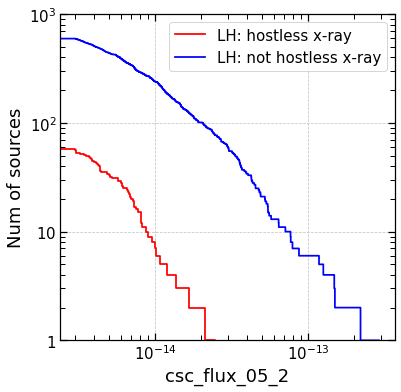

In [8]:
ra_min = 154.763934
ra_max = 167.084550
dec_min = 54.124219
dec_max = 61.236185

hostless_df_lh = hostless_df.query('csc_ra>=@ra_min & csc_ra<=@ra_max & csc_dec>=@dec_min & csc_dec<=@dec_max')
desi_csc_x_ray_only_lh = desi_csc_x_ray_only.query('csc_ra>=@ra_min & csc_ra<=@ra_max & csc_dec>=@dec_min & csc_dec<=@dec_max')

fig,  ax =  plt.subplots( figsize = (6,6))
sns.ecdfplot(hostless_df_lh['csc_flux_05_2'], label='LH: hostless x-ray', complementary=True, stat = 'count' , color='red', ax = ax)
sns.ecdfplot(desi_csc_x_ray_only_lh['csc_flux_05_2'], label='LH: not hostless x-ray', complementary=True, stat = 'count' , color='blue', ax = ax)
ax.set(xscale='log', yscale='log', xlabel='csc_flux_05_2', ylabel='Num of sources', ylim = [1,1e3])
ax.legend()


for fluxlim in [3e-15, 1e-14]:
    print('flux lim:', fluxlim)
    n_hostless_flux_lim = hostless_df_lh.query('csc_flux_05_2 > @fluxlim').shape[0]
    n_not_hostless_flux_lim = desi_csc_x_ray_only_lh.query('csc_flux_05_2 > @fluxlim').shape[0]
    print(f'number of hostless x-ray sources with flux > {fluxlim}:', n_hostless_flux_lim)
    print(f'number of not hostless x-ray sources with flux > {fluxlim}:', n_not_hostless_flux_lim)
    print(f'fraction of hostless x-ray sources with flux > {fluxlim}:', n_hostless_flux_lim/(n_not_hostless_flux_lim + n_hostless_flux_lim))

hostless_df_lh.sample(5)

In [9]:
erosita_orig_df = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14.pkl')

from scripts.cross_match_scripts import search_around_r_data_frames, cross_match_data_frames
ero_hostless = cross_match_data_frames(erosita_orig_df, hostless_df_lh, 'RA_fin', 'DEC_fin', 'csc_ra', 'csc_dec', match_radius = 30)
ero_hostless = ero_hostless.query('matched_sep < 1.5*pos_r98')
ero_hostless['flux_rat'] = ero_hostless['flux_05-20']/ero_hostless['matched_csc_flux_05_2']
ero_hostless[['srcname_fin', 'pos_r98', 'flux_05-20', 'matched_sep', 'matched_csc_name', 'matched_csc_flux_05_2','matched_csc_r_98','flux_rat']]


cross-match radius 30 arcsec
total matches: 22 out of 9215 x 57


,srcname_fin,pos_r98,flux_05-20,matched_sep,matched_csc_name,matched_csc_flux_05_2,matched_csc_r_98,flux_rat
2,SRGe J104522.1+555738,5.399608,2.008208e-14,3.681071,2CXO J104521.9+555734,4.442071e-15,1.179337,4.520883
3,SRGe J103220.4+573211,5.714911,9.351694e-15,1.421180,2CXO J103220.2+573211,4.852860e-15,1.498974,1.927048
4,SRGe J103239.4+574033,6.556224,8.782485e-15,2.364492,2CXO J103239.3+574035,8.115216e-15,1.199912,1.082224
6,SRGe J104453.1+585450,8.352394,6.555353e-15,3.940594,2CXO J104453.0+585453,6.011270e-15,1.327232,1.090510
7,SRGe J104707.4+591249,5.657161,6.344795e-15,1.199593,2CXO J104707.2+591249,6.510092e-15,1.836295,0.974609
8,SRGe J103302.4+580241,6.663467,6.085609e-15,3.061539,2CXO J103302.7+580240,5.264955e-15,2.090497,1.155871
9,SRGe J105118.0+552353,10.753160,6.044226e-15,2.045384,2CXO J105117.8+552354,3.740731e-15,2.010836,1.615787
10,SRGe J105458.3+574348,8.629343,5.335599e-15,3.784660,2CXO J105458.4+574344,5.070014e-15,1.696523,1.052383
11,SRGe J104854.4+573926,8.499000,5.270004e-15,8.777265,2CXO J104853.5+573920,7.151569e-15,2.009572,0.736902
12,SRGe J104544.5+585020,6.675908,5.020989e-15,2.557606,2CXO J104544.2+585019,4.130239e-15,2.049579,1.215666


In [10]:
finall_hostless = pd.DataFrame({'ID': ero_hostless.srcname_fin,	'desi_id_true_ctp': 'hostless'})
finall_hostless.ID = finall_hostless.ID.str.encode('utf-8')
finall_hostless.desi_id_true_ctp = finall_hostless.desi_id_true_ctp.str.encode('utf-8')
finall_hostless.to_pickle(data_path+'validation_ctps_ero_desi_lh_hostless.pkl')

finall_hostless

,ID,desi_id_true_ctp
2,b'SRGe J104522.1+555738',b'hostless'
3,b'SRGe J103220.4+573211',b'hostless'
4,b'SRGe J103239.4+574033',b'hostless'
6,b'SRGe J104453.1+585450',b'hostless'
7,b'SRGe J104707.4+591249',b'hostless'
8,b'SRGe J103302.4+580241',b'hostless'
9,b'SRGe J105118.0+552353',b'hostless'
10,b'SRGe J105458.3+574348',b'hostless'
11,b'SRGe J104854.4+573926',b'hostless'
12,b'SRGe J104544.5+585020',b'hostless'


# Chandra hostless spectra

In [25]:
desi_csc_orig.query('csc_name == "2CXO J103220.2+573211"').sort_values(by = 'dist_arcsec')

,csc_name,csc_ra,csc_dec,csc_flux_05_2,csc_radec_err,csc_r_98,release,objid,brickid,ra,dec,brick_primary,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_g,flux_ivar_r,flux_ivar_z,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,dered_mag_g,dered_mag_r,dered_mag_z,dered_mag_w1,dered_mag_w2,dered_mag_w3,dered_mag_w4,snr_g,snr_r,snr_z,snr_w1,snr_w2,snr_w3,snr_w4,parallax,parallax_ivar,pmra,pmra_ivar,pmdec,pmdec_ivar,dist_arcsec,desi_id,all_mag_g,rel_mag_g,rel_dered_mag_g,all_mag_r,rel_mag_r,rel_dered_mag_r,all_mag_z,rel_mag_z,rel_dered_mag_z,all_mag_w1,rel_mag_w1,rel_dered_mag_w1,vega_mag_w1,all_mag_w2,rel_mag_w2,rel_dered_mag_w2,vega_mag_w2,all_mag_w3,rel_mag_w3,rel_dered_mag_w3,vega_mag_w3,all_mag_w4,rel_mag_w4,rel_dered_mag_w4,vega_mag_w4,rel_desi_flux_corr_z,rel_dered_g_r,rel_dered_g_z,rel_dered_r_z,rel_dered_z_w1,rel_dered_r_w2,rel_dered_w1_w2,rel_dered_z_w3,rel_dered_r_w4,rel_dered_w3_w4
1584567,2CXO J103220.2+573211,158.084192,57.536421,4.852860e-15,0.535893,1.498974,9011,2890,609939,158.088107,57.538123,1,0.317879,0.397066,0.568346,1.197148,-3.614838,13.368994,-14.143246,464.55115,157.504470,168.189590,4.803524,1.168578,0.001513,0.000018,23.728088,23.491892,23.107342,22.303700,NaN,19.684631,NaN,6.851381,4.983204,7.370759,2.623783,-3.907668,0.520089,-0.059815,0.0,0.0,0.0,0.0,0.0,0.0,9.735829,9011_609939_2890,23.744345,23.744345,23.728088,23.502843,23.502843,23.491892,23.113468,23.113468,23.107342,22.304630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.684753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.542236e-16,0.236196,0.620746,0.384550,NaN,NaN,NaN,NaN,NaN,NaN
1584574,2CXO J103220.2+573211,158.084192,57.536421,4.852860e-15,0.535893,1.498974,9011,2808,609939,158.078534,57.534805,1,0.365922,0.814428,1.131290,2.587952,1.040657,13.079647,90.609010,433.32940,144.871550,140.476670,4.757471,1.166353,0.001538,0.000020,23.575037,22.711760,22.359852,21.466665,22.456150,19.708385,17.607025,7.617246,9.802664,13.408374,5.644743,1.123888,0.512867,0.400292,0.0,0.0,0.0,0.0,0.0,0.0,12.385931,9011_609939_2808,23.591529,23.591529,23.575037,22.722868,22.722868,22.711760,22.366065,22.366065,22.359852,21.467609,21.467609,21.466665,18.768609,22.456731,NaN,NaN,NaN,19.708510,NaN,NaN,NaN,17.607072,NaN,NaN,NaN,1.899530e-15,0.863277,1.215185,0.351908,0.893187,NaN,NaN,NaN,NaN,NaN
1584568,2CXO J103220.2+573211,158.084192,57.536421,4.852860e-15,0.535893,1.498974,9011,2848,609939,158.083071,57.539851,1,0.456412,0.751363,1.313584,3.029606,2.494846,-0.160851,-374.095500,330.45624,117.687110,80.974205,4.582562,1.135382,0.001511,0.000018,23.335270,22.799372,22.197700,21.295599,21.506817,NaN,NaN,8.296869,8.151058,11.820376,6.485453,2.658366,-0.006253,-1.608894,0.0,0.0,0.0,0.0,0.0,0.0,12.534557,9011_609939_2848,23.351607,23.351607,23.335270,22.810375,22.810375,22.799372,22.203855,22.203855,22.197700,21.296535,21.296535,21.295599,18.597535,21.507391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.205499e-15,0.535898,1.137570,0.601672,0.902101,NaN,NaN,NaN,NaN,NaN
1584569,2CXO J103220.2+573211,158.084192,57.536421,4.852860e-15,0.535893,1.498974,9011,2793,609939,158.076796,57.537272,1,1.137154,3.004343,5.175815,6.270676,4.485576,-21.795060,459.181180,235.51498,83.719986,48.656643,4.297480,1.081821,0.001478,0.000019,22.343958,21.294516,20.708840,20.505770,20.869875,NaN,15.844993,17.451334,27.489320,36.103542,12.999339,4.665475,-0.837903,1.994594,0.0,0.0,0.0,0.0,0.0,0.0,14.616058,9011_609939_2793,22.360452,22.360452,22.343958,21.305626,21.305626,21.294516,20.715053,20.715053,20.708840,20.506714,20.506714,20.505770,17.807714,20.870454,20.870454,20.869875,17.531454,NaN,NaN,NaN,NaN,15.845040,NaN,NaN,NaN,8.690623e-15,1.049442,1.635118,0.585676,0.203070,0.424641,-0.364105,NaN,NaN,NaN
1584572,2CXO J103220.2+573211,158.084192,57.536421,4.852860e-15,0.535893,1.498974,9011,2913,609939,158.091134,57.533945,1,0.262792,0.452076,0.757360,1.785698,-0.356464,6.214511,-1121.145000,372.26202,127.923676,95.716790,4.671260,1.165954,0.001355,0.000018,23.934708,23.351019,22.795618,21.869549,NaN,20

In [19]:
df =ero_hostless[['srcname_fin', 'pos_r98', 'flux_05-20', 'matched_sep', 'matched_csc_name', 'matched_csc_flux_05_2','matched_csc_r_98','flux_rat', 'matched_smallest_sep']]
df

,srcname_fin,pos_r98,flux_05-20,matched_sep,matched_csc_name,matched_csc_flux_05_2,matched_csc_r_98,flux_rat,matched_smallest_sep
2,SRGe J104522.1+555738,5.399608,2.008208e-14,3.681071,2CXO J104521.9+555734,4.442071e-15,1.179337,4.520883,4.032758
3,SRGe J103220.4+573211,5.714911,9.351694e-15,1.421180,2CXO J103220.2+573211,4.852860e-15,1.498974,1.927048,9.735829
4,SRGe J103239.4+574033,6.556224,8.782485e-15,2.364492,2CXO J103239.3+574035,8.115216e-15,1.199912,1.082224,9.702210
6,SRGe J104453.1+585450,8.352394,6.555353e-15,3.940594,2CXO J104453.0+585453,6.011270e-15,1.327232,1.090510,10.587097
7,SRGe J104707.4+591249,5.657161,6.344795e-15,1.199593,2CXO J104707.2+591249,6.510092e-15,1.836295,0.974609,3.211921
8,SRGe J103302.4+580241,6.663467,6.085609e-15,3.061539,2CXO J103302.7+580240,5.264955e-15,2.090497,1.155871,6.516825
9,SRGe J105118.0+552353,10.753160,6.044226e-15,2.045384,2CXO J105117.8+552354,3.740731e-15,2.010836,1.615787,10.114483
10,SRGe J105458.3+574348,8.629343,5.335599e-15,3.784660,2CXO J105458.4+574344,5.070014e-15,1.696523,1.052383,2.720379
11,SRGe J104854.4+573926,8.499000,5.270004e-15,8.777265,2CXO J104853.5+573920,7.151569e-15,2.009572,0.736902,12.169596
12,SRGe J104544.5+585020,6.675908,5.020989e-15,2.557606,2CXO J104544.2+585019,4.130239e-15,2.049579,1.215666,11.085349


In [18]:
ero_hostless[['matched_csc_ra', 'matched_csc_dec']].iloc[0]

matched_csc_ra     161.341659
matched_csc_dec     55.959620
Name: 2, dtype: float64